### What drives price of a car ?

### 1) Business Understanding

#### Objective:
Understand what factors influence the price of used cars to provide insights and recommendations to a used car dealership.

#### Key Questions:
What features of a car are most strongly correlated with its price?
How do different car attributes like brand, model, mileage, age, and condition affect its price?
#### Success Criteria: 
Provide actionable insights that can help the dealership optimize its pricing strategy and inventory.


### 2) Data Understanding

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### 2.1 Data Collection:

In [29]:
# load the provided vehicle dataset provided.
used_cars = pd.read_csv("data/vehicles.csv")
print (used_cars.shape)
used_cars.describe()

(426880, 18)


,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


#### There are 426,880 rows of data and 18 features on the used car dataset we will evluate to build a model
#### for the dealership to use while making decisions on how to sell a use car.

### 2.2 Exploratory Data Analysis (EDA)

In [3]:
# To make data exploration easie for the first iteration, I am just loading 100,00 random rows into a dataframe
#used_cars = used_cars.sample(n=10000)

used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [4]:
used_cars.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [5]:
# Check for missing values
missing_values = used_cars.isnull().sum()
print(missing_values)

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


In [6]:
#remove null data
used_cars_data = used_cars.dropna()
# after 1st iteration, realized that VIN,  id, region can be dropped, as they are not going to be used to calculate price

used_cars_data = used_cars_data.drop('VIN', axis=1)
used_cars_data = used_cars_data.drop('id', axis=1)

used_cars_data.shape

(34868, 16)

In [7]:
used_cars_data.describe()


,price,year,odometer
count,34868.000000,34868.000000,3.486800e+04
mean,15837.446771,2011.176867,1.073991e+05
std,13460.056823,7.162332,9.990878e+04
min,0.000000,1905.000000,0.000000e+00
25%,6500.000000,2008.000000,6.516400e+04
50%,12000.000000,2013.000000,1.040000e+05
75%,22003.500000,2016.000000,1.411678e+05
max,155000.000000,2022.000000,9.999999e+06


In [8]:

used_cars_data.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
126,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,rwd,full-size,van,white,al
127,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,rwd,full-size,van,white,al
128,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,rwd,full-size,van,white,al
215,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,fwd,compact,sedan,blue,al
219,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,rwd,mid-size,sedan,white,al


### 3 Data Preparation

#### 3.1 Data Cleaning: Handle missing values and outliers.

(34868, 16)

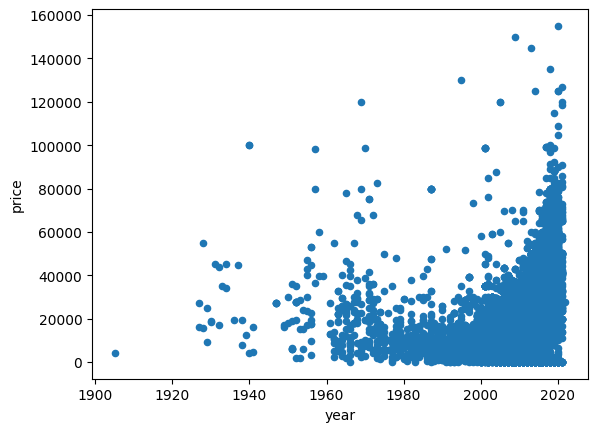

In [32]:
# plot price data on the chart to look for outliers

used_cars_data.plot(kind='scatter',x='year', y='price', style='o')

used_cars_data.shape

(32435, 17)

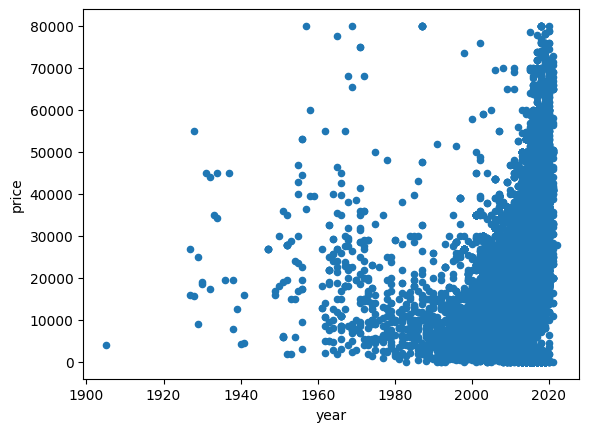

In [78]:
# lets remove data with price of the car = $0 or greater than $80,000 (this data point may change based on business feedback)

used_cars_data_clean = used_cars_data[used_cars_data['price'].gt(0) & used_cars_data['price'].lt(80000)].reset_index()

used_cars_data_clean.plot(kind='scatter',x='year', y='price', style='o')
used_cars_data_clean.shape

In [79]:
# based on multicollinearity vif results from the previous run, lets drop the below features as they seems 
# to provide a vif value of infinity. I wanted to only focus on featrures thats manageable from this experiment, 
# that is I am aiming for a smaller model.
used_cars_data_clean = used_cars_data_clean.drop(['region','manufacturer', 'model'], axis=1).reset_index()


# Check for missing values
missing_values = used_cars_data_clean.isnull().sum()

print(missing_values)

level_0         0
index           0
price           0
year            0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64


#### 3.2 Feature Engineering: Create new features or transform existing ones to better capture the relationships in the data.

In [80]:
# Encoding Categorical Variables
used_cars_data_encoded = pd.get_dummies(used_cars_data_clean, drop_first=True)
used_cars_data_encoded

,level_0,index,price,year,odometer,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_other,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_manual,transmission_other,drive_fwd,drive_rwd,size_full-size,size_mid-size,size_sub-compact,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,state_al,state_ar,state_az,state_ca,state_co,state_ct,state_dc,state_de,state_fl,state_ga,state_hi,state_ia,state_id,state_il,state_in,state_ks,state_ky,state_la,state_ma,state_md,state_me,state_mi,state_mn,state_mo,state_ms,state_mt,state_nc,state_nd,state_ne,state_nh,state_nj,state_nm,state_nv,state_ny,state_oh,state_ok,state_or,state_pa,state_ri,state_sc,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,0,215,4000,2002.0,155000.0,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1,219,2500,1995.0,110661.0,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2,268,9000,2008.0,56700.0,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,3,337,8950,2011.0,164000.0,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,4,338,4000,1972.0,88100.0,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,

In [81]:
# VIF - measure of the multicollinearity in the independent features

def vif(exogs, data):
  vif_dict = {}

  for exog in exogs:
    not_exog = [i for i in exogs if i != exog]
    X11, y11 = data[not_exog], data[exog]

    r_squared = LinearRegression().fit(X11,y11).score(X11,y11)

    # calc the VIF
    if(r_squared !=0):
        vif = 1/(1-r_squared)
    else:
        vif = 1
    vif_dict[exog] = vif
    
    print(pd.DataFrame({"VIF":vif_dict}))

  return pd.DataFrame({"VIF":vif_dict})

In [82]:
# Find Collinearity between features
X1 = used_cars_data_encoded.drop('price', axis=1)
y1 = used_cars_data_encoded['price']
X1_train ,X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
vif(X1.columns, X1).sort_values(by = 'VIF', ascending = False)

                 VIF
level_0  4447.601658
                 VIF
index    4766.538643
level_0  4447.601658
                 VIF
index    4766.538643
level_0  4447.601658
year        1.422152
                  VIF
index     4766.538643
level_0   4447.601658
odometer     1.107941
year         1.422152
                        VIF
condition_fair     1.068341
index           4766.538643
level_0         4447.601658
odometer           1.107941
year               1.422152
                        VIF
condition_fair     1.068341
condition_good     1.244296
index           4766.538643
level_0         4447.601658
odometer           1.107941
year               1.422152
                            VIF
condition_fair         1.068341
condition_good         1.244296
condition_like new     1.139574
index               4766.538643
level_0             4447.601658
odometer               1.107941
year                   1.422152
                            VIF
condition_fair         1.068341
condition_good   

,VIF
index,4766.538643
level_0,4447.601658
state_wi,151.327982
state_tx,138.463044
state_va,118.807332
state_ny,98.054659
state_pa,87.438295
state_tn,86.085402
state_vt,80.014098
state_or,77.930200


#### 3.4 Data Transformation: Normalize or scale features if necessary

In [83]:
# Feature Scaling:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(used_cars_data_encoded.drop('price', axis=1))
#used_cars_scaled = pd.DataFrame(scaled_features, columns=used_cars_data_encoded.columns.drop('price'))
#used_cars_scaled['price'] = used_cars_data['price']
#used_cars_scaled.dropna()
used_cars_scaled = pd.DataFrame(scaled_features, columns=used_cars_data_encoded.columns.drop('price'))
used_cars_scaled.tail()
print(used_cars_scaled.shape)
print(used_cars_data_encoded.shape)


(32435, 105)
(32435, 106)


In [84]:
# Introspect the data and add the price feature back to the dataframe
used_cars_data_encoded['price']
used_cars_scaled['price'] = used_cars_data_encoded['price']
used_cars_scaled

,level_0,index,year,odometer,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_other,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_manual,transmission_other,drive_fwd,drive_rwd,size_full-size,size_mid-size,size_sub-compact,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,state_al,state_ar,state_az,state_ca,state_co,state_ct,state_dc,state_de,state_fl,state_ga,state_hi,state_ia,state_id,state_il,state_in,state_ks,state_ky,state_la,state_ma,state_md,state_me,state_mi,state_mn,state_mo,state_ms,state_mt,state_nc,state_nd,state_ne,state_nh,state_nj,state_nm,state_nv,state_ny,state_oh,state_ok,state_or,state_pa,state_ri,state_sc,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy,price
0,-1.731997,-1.743345,-1.235581,0.448256,-0.123593,-0.656216,-0.361730,-0.071069,-0.033334,-0.018419,-0.045155,1.429324,-0.09162,-0.705946,-0.667728,-0.053042,-0.047819,0.336720,-0.110176,-0.031426,-0.064409,-0.02078,-0.007853,-0.157591,-0.086158,-0.230845,-0.147649,1.457552,-0.515803,-1.199391,-0.615281,-0.135644,-0.036435,-0.157899,-0.211995,-0.186302,-0.136115,-0.050036,-0.053912,-0.292605,1.774773,-0.522072,-0.231807,-0.156354,3.057678,-0.153326,-0.165626,-0.163153,-0.373617,-0.068617,-0.047167,-0.312698,-0.400374,-0.623810,-0.081688,8.762521,-0.067012,-0.137168,-0.337911,-0.154795,-0.096295,-0.075119,-0.0578,-0.341805,-0.091449,-0.079948,-0.180919,-0.137634,-0.141197,-0.132908,-0.137402,-0.130485,-0.064167,-0.143563,-0.070409,-0.077972,-0.19778,-0.158513,-0.109024,-0.044811,-0.10399,-0.186656,-0.064167,-0.064167,-0.077167,-0.157899,-0.085977,-0.082638,-0.236713,-0.181373,-0.125254,-0.176324,-0.178358,-0.084694,-0.118346,-0.067934,-0.165331,-0.203845,-0.068617,-0.176324,-0.145785,-0.098393,-0.188154,-0.052158,-0.051860,4000
1,-1.731891,-1.743312,-2.203021,0.014772,8.091055,-0.656216,-0.361730,-0.071069,-0.033334,-0.018419,-0.045155,-0.699631,-0.09162,1.416539,-0.667728,-0.053042,-0.047819,0.336720,-0.110176,-0.031426,-0.064409,-0.02078,-0.007853,-0.157591,-0.086158,-0.230845,-0.147649,-0.686082,1.938725,-1.199391,1.625275,-0.135644,-0.036435,-0.157899,-0.211995,-0.186302,-0.136115,-0.050036,-0.053912,-0.292605,1.774773,-0.522072,-0.231807,-0.156354,-0.327046,-0.153326,-0.165626,-0.163153,-0.373617,-0.068617,-0.047167,-0.312698,-0.400374,1.603053,-0.081688,8.762521,-0.067012,-0.137168,-0.337911,-0.154795,-0.096295,-0.075119,-0.0578,-0.341805,-0.091449,-0.079948,-0.180919,-0.137634,-0.141197,-0.132908,-0.137402,-0.130485,-0.064167,-0.143563,-0.070409,-0.077972,-0.19778,-0.158513,-0.109024,-0.044811,-0.10399,-0.186656,-0.064167,-0.064167,-0.077167,-0.157899,-0.085977,-0.082638,-0.236713,-0.181373,-0.125254,-0.176324,-0.178358,-0.084694,-0.118346,-0.067934,-0.165331,-0.203845,-0.068617,-0.176324,-0.145785,-0.098393,-0.188154,-0.052158,-0.051860,2500
2,-1.731784,-1.742907,-0.406347,-0.512784,-0.123593,-0.656216,-0.361730,-0.071069,-0.033334,-0.018419,-0.045155,1.429324,-0.09162,-0.705946,-0.667728,-0.053042,-0.047819,0.336720,-0.110176,-0.031426,-0.064409,-0.02078,-0.007853,-0.157591,-0.086158,-0.230845,-0.147649,-0.686082,1.938725,-1.199391,-0.615281,-0.135644,-0.036435,6.333167,-0.211995,-0.186302,-0.136115,-0.050036,-0.053912,-0.292605,-0.563452,-0.522072,-0.231807,-0.156354,-0.327046,-0.153326,-0.165626,-0.163153,-0.373617,-0.068617,-0.047167,-0.312698,-0.400374,1.603053,-0.081688,8.762521,-0.067012,-0.137168,-0.337911,-0.154795,-0.096

In [85]:
# ensure price is added back and there is no missing values before we start modelling 
missing_values_scaled = used_cars_scaled.isnull().sum()
print(missing_values_scaled)

level_0                    0
index                      0
year                       0
odometer                   0
condition_fair             0
condition_good             0
condition_like new         0
condition_new              0
condition_salvage          0
cylinders_12 cylinders     0
cylinders_3 cylinders      0
cylinders_4 cylinders      0
cylinders_5 cylinders      0
cylinders_6 cylinders      0
cylinders_8 cylinders      0
cylinders_other            0
fuel_electric              0
fuel_gas                   0
fuel_hybrid                0
fuel_other                 0
title_status_lien          0
title_status_missing       0
title_status_parts only    0
title_status_rebuilt       0
title_status_salvage       0
transmission_manual        0
transmission_other         0
drive_fwd                  0
drive_rwd                  0
size_full-size             0
size_mid-size              0
size_sub-compact           0
type_bus                   0
type_convertible           0
type_coupe    

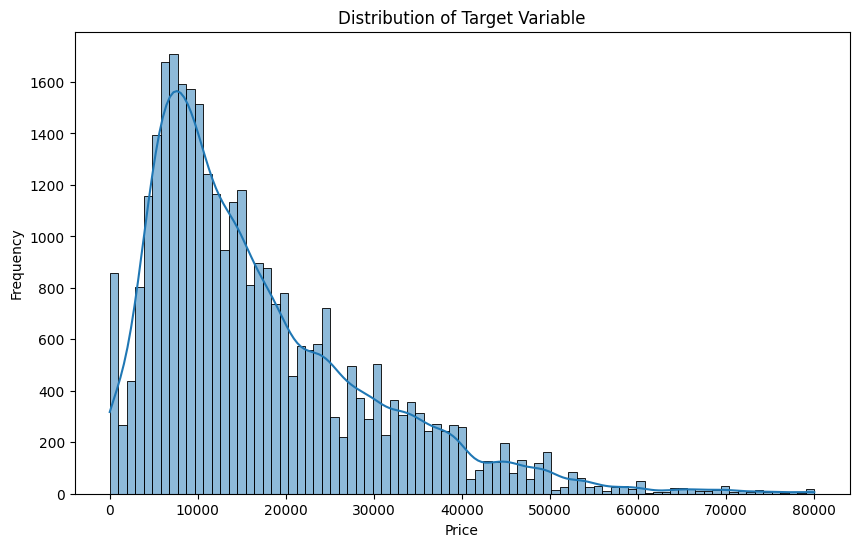

In [86]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(used_cars_scaled['price'], kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

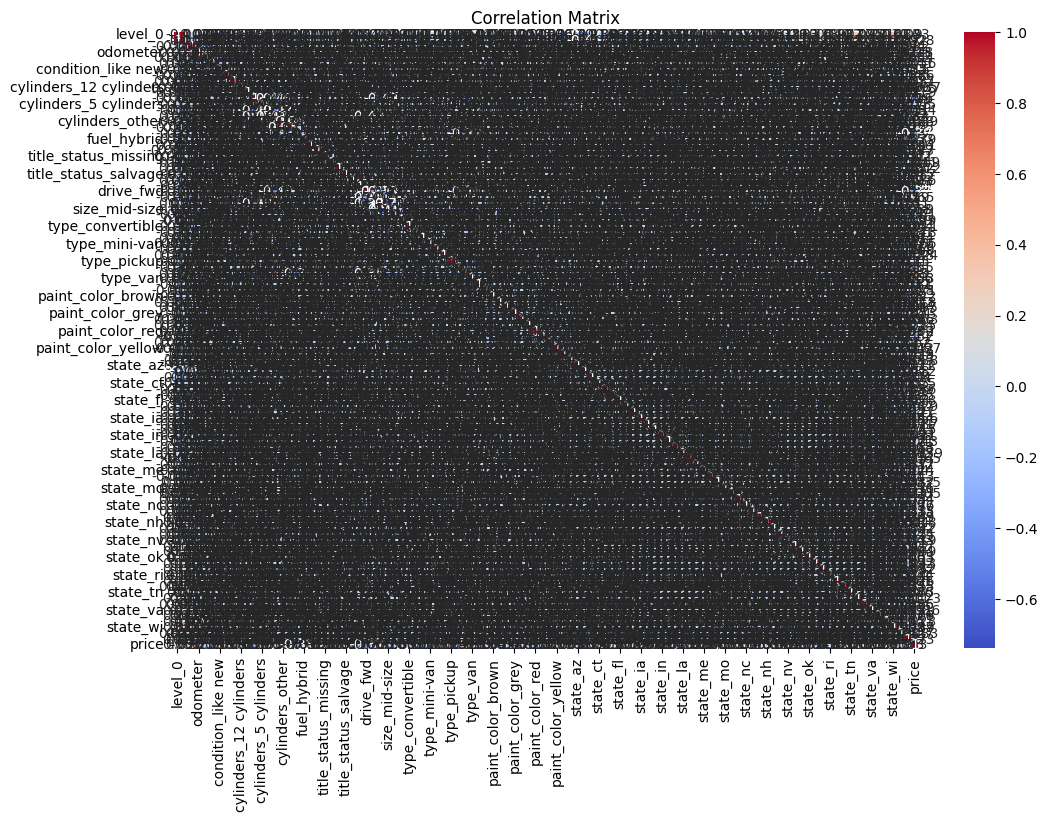

In [19]:

# Visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(used_cars_scaled.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [87]:
# Features to be used to build the model going forward
print (used_cars_scaled.columns)

Index(['level_0', 'index', 'year', 'odometer', 'condition_fair', 'condition_good', 'condition_like new', 'condition_new', 'condition_salvage', 'cylinders_12 cylinders',
       ...
       'state_tn', 'state_tx', 'state_ut', 'state_va', 'state_vt', 'state_wa', 'state_wi', 'state_wv', 'state_wy', 'price'], dtype='object', length=106)


### 4 Modeling

#### 4.1 Splitting the data

In [88]:
X = used_cars_scaled.drop('price', axis=1)
y = used_cars_scaled['price']
X_train ,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 4.2 Building and Evaluating the Model

Model Selection: Will use linear regression, Ridgr Regression and Lasso Regression as the odel to understand the relationship between car features and price. Based on the accuracy of the model , we will select one of the three.

#### Linear Regression 

In [89]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_liner = r2_score(y_test, y_pred_linear)
print ('MSE : ' + str(mse_linear))
print ('R2 : ' + str(r2_liner))

MSE : 69454452.63359872
R2 : 0.5835383824157656


#### Ridge Regression

In [90]:
ridge_model = Ridge(alpha=1.0)  # You can tune the alpha parameter
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print ('MSE Ridge: ' + str(mse_ridge))
print ('R2 Ridge: ' + str(r2_ridge))

MSE Ridge: 69454086.98221356
R2 Ridge: 0.5835405749284348


#### Lasso Regression 

In [91]:
lasso_model = Lasso(alpha=1.0)  # You can tune the alpha parameter
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print ('MSE Lasso: ' + str(mse_lasso))
print ('R2 Lasso: ' + str(r2_lasso))

MSE Lasso: 69439916.69577917
R2 Lasso: 0.5836255425609815


#### 4.3 Model Evaluation:

Based on the MSE and R2 from the above model been evaluated, the Lasso Regression is the more efficient, 
as it has the lowest MSE and the highest R2 value been evaluated so far.

RMSE (Root Mean Squared Error) = 69439916.69577917  : This value indicates the average error in the predictions. 

R2 (R-squared) = 0.5836255425609815: This value indicates that approximately 58.36% of the variance in the target variable (price) is explained by the features in the model. While this is a moderate level of explanation, it also indicates that there is still a significant amount of unexplained variance, suggesting room for model improvement.


#### 4.4 Applying Cross-Validation and Hyperparameter Tuning

In [92]:
# Linear Regression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


In [93]:
# Linear Regression with Cross-Validation
linear_model = LinearRegression()
linear_cv_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

print("Linear Regression Cross-Validation MAE Scores:", -linear_cv_scores)
print("Linear Regression Cross-Validation Mean MAE:", -np.mean(linear_cv_scores))


Linear Regression Cross-Validation MAE Scores: [5755.54163305 5709.07214605 5740.98601604 5633.21776747 5749.43309326]
Linear Regression Cross-Validation Mean MAE: 5717.650131174573


In [94]:
# Lasso Regression

In [95]:
# Lasso Regression with GridSearchCV
lasso_model = Lasso()
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(lasso_model, lasso_params, cv=5, scoring='neg_mean_absolute_error')
lasso_grid.fit(X_train, y_train)

print("Best Lasso Alpha:", lasso_grid.best_params_['alpha'])
print("Best Lasso CV Score:", -lasso_grid.best_score_)


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.370e+11, tolerance: 3.310e+08

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.021e+11, tolerance: 3.305e+08

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.344e+11, tolerance: 3.345e+08

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent

Best Lasso Alpha: 10
Best Lasso CV Score: 5716.009399103752


In [96]:
# Ridge Regression

In [97]:
# Ridge Regression with GridSearchCV
ridge_model = Ridge()
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5, scoring='neg_mean_absolute_error')
ridge_grid.fit(X_train, y_train)

print("Best Ridge Alpha:", ridge_grid.best_params_['alpha'])
print("Best Ridge CV Score:", -ridge_grid.best_score_)


Best Ridge Alpha: 1
Best Ridge CV Score: 5717.608658463704


In [98]:
# Evaluating the Tuned Models on Test Data
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [99]:
# Train the models with the best hyperparameters
best_lasso = Lasso(alpha=lasso_grid.best_params_['alpha'])
best_ridge = Ridge(alpha=ridge_grid.best_params_['alpha'])

best_lasso.fit(X_train, y_train)
best_ridge.fit(X_train, y_train)

# Make predictions
linear_pred_eval = linear_model.fit(X_train, y_train).predict(X_test)
lasso_pred_eval = best_lasso.predict(X_test)
ridge_pred_eval = best_ridge.predict(X_test)

# Evaluate the models
linear_mae_eval = mean_absolute_error(y_test, linear_pred_eval)
linear_mse_eval = mean_squared_error(y_test, linear_pred_eval)
linear_r_squared_eval = linear_model.score(X_test, y_test)

lasso_mae_eval = mean_absolute_error(y_test, lasso_pred_eval)
lasso_mse_eval = mean_squared_error(y_test, lasso_pred_eval)
lasso_r_squared_eval = best_lasso.score(X_test, y_test)

ridge_mae_eval = mean_absolute_error(y_test, ridge_pred_eval)
ridge_mse_eval = mean_squared_error(y_test, ridge_pred_eval)
ridge_r_squared_eval = best_ridge.score(X_test, y_test)

print(f'Linear Regression MAE: {linear_mae_eval}')
print(f'Linear Regression MSE: {linear_mse_eval}')
print(f'Linear Regression R-squared: {linear_r_squared_eval}\n')

print(f'Lasso Regression MAE: {lasso_mae_eval}')
print(f'Lasso Regression MSE: {lasso_mse_eval}')
print(f'Lasso Regression R-squared: {lasso_r_squared_eval}\n')

print(f'Ridge Regression MAE: {ridge_mae_eval}')
print(f'Ridge Regression MSE: {ridge_mse_eval}')
print(f'Ridge Regression R-squared: {ridge_r_squared_eval}\n')


Linear Regression MAE: 5818.198695824804
Linear Regression MSE: 69454452.63359872
Linear Regression R-squared: 0.5835383824157656

Lasso Regression MAE: 5818.61459055438
Lasso Regression MSE: 69451166.96185082
Lasso Regression R-squared: 0.58355808390529

Ridge Regression MAE: 5818.085147547225
Ridge Regression MSE: 69454086.98221356
Ridge Regression R-squared: 0.5835405749284348



### 5 Interpretation of Results

Based on lowest MSE and highest R², we can conclude that Lasso Regression is the best model to predict price for used cars.
The Best Lasso Alpha: 1 annd the best Lasso CV Score: 5742

#### 5.1 Lasso model - Final performance metrics and model interpretation

In [100]:
# Use the best Lasso model to make predictions
#best_models = {}
#best_lasso_model = best_models['Lasso']
y_pred_lasso = best_lasso.predict(X_test)

# Create a DataFrame to show actual vs. predicted values
actual_vs_predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lasso})
actual_vs_predicted_df.head(20)

,Actual,Predicted
29811,13498,17162.763578
9758,7999,15224.829141
7998,26700,22407.575114
31545,4595,7001.499214
11326,6950,9858.752314
32297,29999,27258.391821
4170,13999,18553.804981
23813,49950,29089.883377
24245,4988,2358.289219
25943,5900,15084.656367


#### 5.2 Plot the results

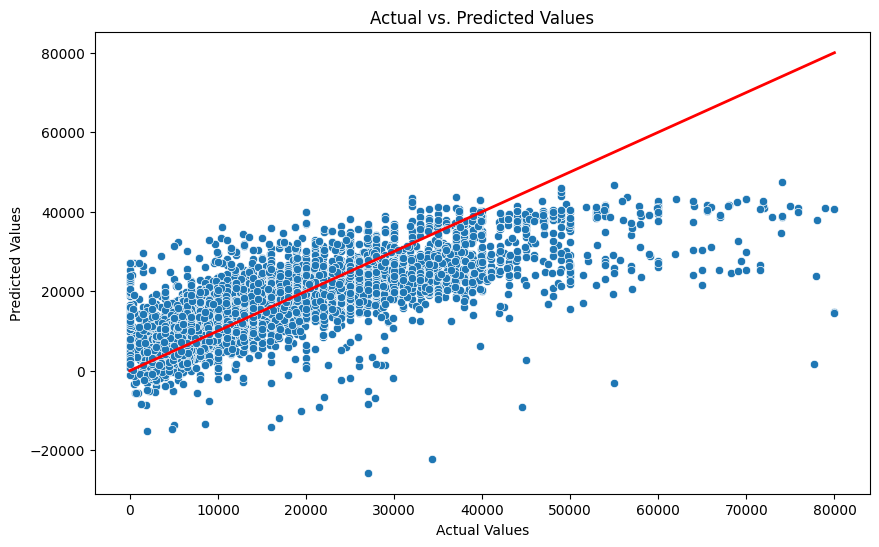

In [101]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=actual_vs_predicted_df)
plt.plot([actual_vs_predicted_df['Actual'].min(), actual_vs_predicted_df['Actual'].max()],
         [actual_vs_predicted_df['Actual'].min(), actual_vs_predicted_df['Actual'].max()],
         color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

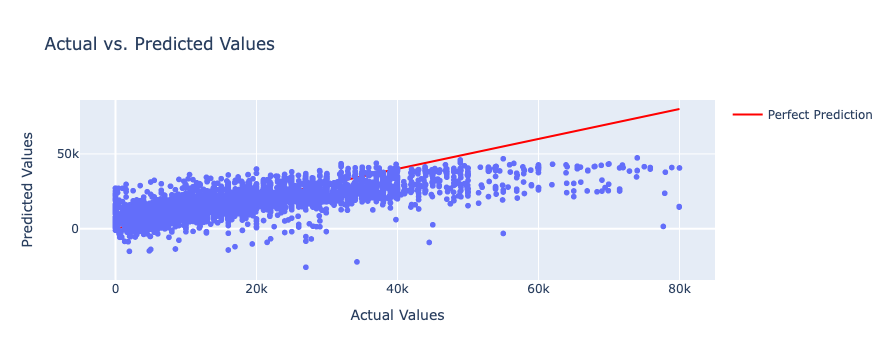

In [102]:
# Plot actual vs. predicted values

# Create scatter plot
fig = px.scatter(
    actual_vs_predicted_df,
    x='Actual',
    y='Predicted',
    title='Actual vs. Predicted Values',
    labels={'Actual': 'Actual Values', 'Predicted': 'Predicted Values'}
)

# Add a line for perfect predictions
fig.add_trace(
    go.Scatter(
        x=[actual_vs_predicted_df['Actual'].min(), actual_vs_predicted_df['Actual'].max()],
        y=[actual_vs_predicted_df['Actual'].min(), actual_vs_predicted_df['Actual'].max()],
        mode='lines',
        name='Perfect Prediction',
        line=dict(color='red', width=2)
    )
)

# Save the plot as an HTML file
fig.write_html("actual_vs_predicted.html")

# To display the plot (optional)
fig.show()

In [105]:

# When the price of a car is equal or less than $80,000 we already found from the training data set
#that there are outliers in the dataset and hence we removed it from the training dataset. 
# So as the price goes near by $80, the accuracy of the model decreases.

#### 5.3 Interpret the Coefficients and Y-Intercept

In [103]:
# Get the coefficients and the intercept from the best Lasso model

coefficients = pd.Series(best_lasso.coef_, index=X_train.columns)
intercept = best_lasso.intercept_

coefficients_df = pd.DataFrame(coefficients)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

print("Lasso Regression Coefficients:")
print(coefficients_df)
print("\nIntercept:", intercept)

Lasso Regression Coefficients:
                                   0
level_0                  -353.662742
index                   -1115.509310
year                     3882.639778
odometer                -1952.580027
condition_fair           -479.516721
condition_good           -785.135389
condition_like new       1010.521121
condition_new             682.266359
condition_salvage         -98.473378
cylinders_12 cylinders    107.071444
cylinders_3 cylinders      -0.000000
cylinders_4 cylinders    -798.249373
cylinders_5 cylinders    -208.591568
cylinders_6 cylinders     166.843037
cylinders_8 cylinders    1273.218289
cylinders_other            49.411947
fuel_electric            -204.829415
fuel_gas                -3573.168817
fuel_hybrid             -1030.708573
fuel_other               -374.667209
title_status_lien         184.228323
title_status_missing       57.486305
title_status_parts only   -37.466425
title_status_rebuilt     -147.062607
title_status_salvage     -282.377419
transmi

### 6 Recommendations


When all features are neglected, the average price of a used car a dealer can expect is $16,999.

#### 6.1 Features with significant impact:

year : 3882.639778 --> The newer the car is, the price increase by a factor of 3882 aprox.

odometer : -1952.580027 --> More the odometer on a car, the price decreases by a factor of 1952 approx

condition --> Condition of the car is a significant feature that would impact the price of a car. A new condition can increase the price by a factor of 682 approx, where as a fair condition can decrease the price of a car by a 479 times approx. 

Fuel--> Fule is an additional element in a car that would reduce the over all price of a used car. If the car is electric, the price get reduced by a lower margin (204), where as if the car is gas based, the price gets significantly reduced by a factor of 3573.

Size: If the used car is a truck, it's value increases significantly by a factor of 2354, where is if it is a sedan the value decreases by a factor of 553

State: Vermont follwed by Tennessee has the highest price of a used car, vs sate like California or FLorida, that has the lowest value.

### 7 Conclusions

Inventory strategy:  The best inventory strategy for the dealer of the used car would be to stock 
newer model car that has less odometer reading, probably an electric or hybrid
and it has to be a truck or a full size SUV. Another strategy the car dealer should ensure 
they have is to open offices in Tennessee or Vermont and avoid dealership in California or Florida.

In [ ]:
Pricing strategy: 